# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
import json
units = 'imperial'
index = 0

#set up lists
latitudes = []
longitudes = []
max_temperatures = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_updated = []

#loop through cities to append information to the lists
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city +"&units=" + units + "&appid=" + weather_api_key
    "http://api.openweathermap.org/data/2.5/weather?q=barentsburg&appid=1e44bc9d31c9878cf91aa040278c13af"
    response = requests.get(url).json()
    try:
        #append to the lists the responses
        latitudes.append(response["coord"]["lat"])
        longitudes.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        max_temperatures.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        cities_updated.append(city)
        print("Processing Record #" + str(index) + " of Set #" + str(len(cities)) +" | " + city)
    except KeyError:
        print(city + " does not exist.")
        
    #print(city)
    #print(response)
    #print(url)
    #if index == 5:
        #break;
    index = index + 1

Processing Record #0 of Set #620 | hobart
Processing Record #1 of Set #620 | mayo
Processing Record #2 of Set #620 | rikitea
Processing Record #3 of Set #620 | mataura
Processing Record #4 of Set #620 | roald
Processing Record #5 of Set #620 | port hedland
Processing Record #6 of Set #620 | hirara
Processing Record #7 of Set #620 | georgetown
Processing Record #8 of Set #620 | castro
Processing Record #9 of Set #620 | auki
Processing Record #10 of Set #620 | tuktoyaktuk
Processing Record #11 of Set #620 | avarua
Processing Record #12 of Set #620 | abha
Processing Record #13 of Set #620 | esperance
Processing Record #14 of Set #620 | albany
Processing Record #15 of Set #620 | ushuaia
Processing Record #16 of Set #620 | torbay
Processing Record #17 of Set #620 | zhigansk
Processing Record #18 of Set #620 | hurghada
Processing Record #19 of Set #620 | cockburn town
Processing Record #20 of Set #620 | bengkulu
Processing Record #21 of Set #620 | chokurdakh
Processing Record #22 of Set #620

Processing Record #185 of Set #620 | polunochnoye
Processing Record #186 of Set #620 | dolores
Processing Record #187 of Set #620 | kavali
Processing Record #188 of Set #620 | margate
Processing Record #189 of Set #620 | turayf
Processing Record #190 of Set #620 | wajima
Processing Record #191 of Set #620 | namibe
tawkar does not exist.
Processing Record #193 of Set #620 | high level
Processing Record #194 of Set #620 | pouebo
Processing Record #195 of Set #620 | umba
Processing Record #196 of Set #620 | barrow
Processing Record #197 of Set #620 | mar del plata
Processing Record #198 of Set #620 | humaita
Processing Record #199 of Set #620 | yarada
saleaula does not exist.
Processing Record #201 of Set #620 | upernavik
Processing Record #202 of Set #620 | tuatapere
Processing Record #203 of Set #620 | moskovskiy
Processing Record #204 of Set #620 | ariquemes
Processing Record #205 of Set #620 | joetsu
Processing Record #206 of Set #620 | aykhal
ruatoria does not exist.
Processing Recor

Processing Record #370 of Set #620 | talara
Processing Record #371 of Set #620 | belmopan
Processing Record #372 of Set #620 | sydney
Processing Record #373 of Set #620 | beihai
Processing Record #374 of Set #620 | nizhniy ingash
Processing Record #375 of Set #620 | mankapur
Processing Record #376 of Set #620 | usinsk
chagda does not exist.
barawe does not exist.
Processing Record #379 of Set #620 | newport
Processing Record #380 of Set #620 | dongkan
Processing Record #381 of Set #620 | ryotsu
Processing Record #382 of Set #620 | fort nelson
Processing Record #383 of Set #620 | nantucket
Processing Record #384 of Set #620 | kefamenanu
Processing Record #385 of Set #620 | veraval
Processing Record #386 of Set #620 | charters towers
Processing Record #387 of Set #620 | sambava
Processing Record #388 of Set #620 | mount isa
Processing Record #389 of Set #620 | te anau
Processing Record #390 of Set #620 | nalut
Processing Record #391 of Set #620 | whitehorse
Processing Record #392 of Set 

Processing Record #553 of Set #620 | salaya
Processing Record #554 of Set #620 | gwadar
Processing Record #555 of Set #620 | zabid
Processing Record #556 of Set #620 | thiruvananthapuram
Processing Record #557 of Set #620 | sumbe
Processing Record #558 of Set #620 | hobyo
Processing Record #559 of Set #620 | eyemouth
Processing Record #560 of Set #620 | garden city
Processing Record #561 of Set #620 | panjab
Processing Record #562 of Set #620 | castanos
Processing Record #563 of Set #620 | mmathubudukwane
Processing Record #564 of Set #620 | marevo
Processing Record #565 of Set #620 | vysokogornyy
Processing Record #566 of Set #620 | rangoon
angra does not exist.
Processing Record #568 of Set #620 | pacific grove
Processing Record #569 of Set #620 | constantine
khonuu does not exist.
Processing Record #571 of Set #620 | birjand
Processing Record #572 of Set #620 | madaoua
Processing Record #573 of Set #620 | penzance
Processing Record #574 of Set #620 | lakatoro
Processing Record #575 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({"City": cities_updated,
                            "Lat": latitudes,
                            "Lng": longitudes,
                            "Max Temp": max_temperatures,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": countries,
                            "Date": dates})

In [5]:
weather_data.to_csv("weatherpy_data.csv", index = False)

In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.539241,21.526159,49.397951,73.092820,58.397548,8.213625,1.643662e+09
std,33.822695,89.658152,31.758694,21.967284,40.711453,6.018709,1.348904e+02
min,-54.800000,-179.166700,-37.260000,8.000000,0.000000,0.000000,1.643661e+09
25%,-8.666650,-54.401950,30.110000,63.000000,14.000000,3.700000,1.643662e+09
50%,25.121600,26.433300,62.150000,78.000000,75.000000,6.910000,1.643662e+09
75%,49.750100,100.393550,75.260000,89.000000,100.000000,11.500000,1.643662e+09
max,78.218600,177.483300,96.490000,100.000000,100.000000,39.120000,1.643662e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
indices_cities_high_humidity = []
index = 0
for humidity in weather_data["Humidity"]:
    if humidity > 100:
        indices_cities_high_humidity.append(index)
    index = index + 1
if (len(indices_cities_high_humidity) == 0):
    print  ("No cities have humidity over 100%")
else:
    print("The indices of the cities with high humidity are: " + indices_cities_high_humidity)

No cities have humidity over 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data[weather_data["Humidity"] < 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

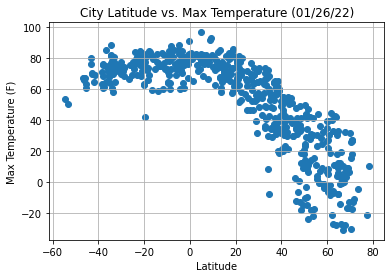

<Figure size 432x288 with 0 Axes>

In [9]:
y_axis = clean_city_data["Max Temp"]
x_axis = clean_city_data["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("City Latitude vs. Max Temperature (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (F)");
plt.grid()
plt.show()

#Save as png
plt.savefig("City_Latitude_vs_Max_Temperature.png");


# Explanation of Plot
- This graph is showing the latitude (distance between a point on the Earth's surface and the equator) vs the max temperaure in Faranheit.



## Latitude vs. Humidity Plot

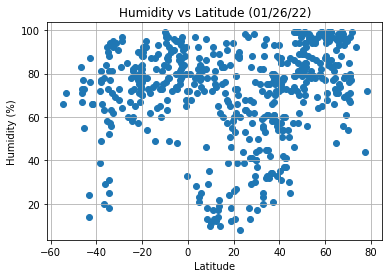

<Figure size 432x288 with 0 Axes>

In [10]:
y_axis = clean_city_data["Humidity"]
x_axis = clean_city_data["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Humidity vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.grid()
plt.show()

#Save as png
plt.savefig("City_Latitude_vs_Humidity.png");


# Explanation of Plot
- This graph is showing the latitude (distance between a point on the Earth's surface and the equator) vs the humidity percentage.

## Latitude vs. Cloudiness Plot

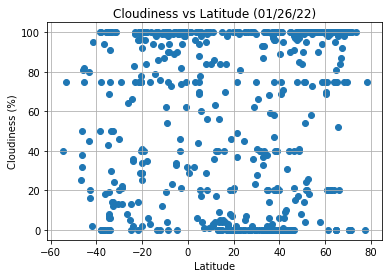

<Figure size 432x288 with 0 Axes>

In [11]:
y_axis = clean_city_data["Cloudiness"]
x_axis = clean_city_data["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Cloudiness vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness (%)");
plt.grid()
plt.show()

#Save as png
plt.savefig("City_Latitude_vs_Cloudiness.png");

# Explanation of Plot
- This graph is showing the latitude (distance between a point on the Earth's surface and the equator) vs the cloudiness percentage.

## Latitude vs. Wind Speed Plot

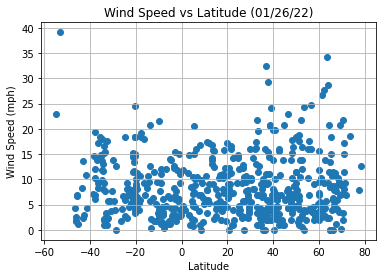

<Figure size 432x288 with 0 Axes>

In [12]:
y_axis = clean_city_data["Wind Speed"]
x_axis = clean_city_data["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Wind Speed vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (mph)");
plt.grid()
plt.show()

#Save as png
plt.savefig("City_Latitude_vs_Wind_Speed.png");

# Explanation of Plot
- This graph is showing the latitude (distance between a point on the Earth's surface and the equator) vs the wind speed in miles per hour.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y= -1.31x + 91.67
The r-value is -0.85


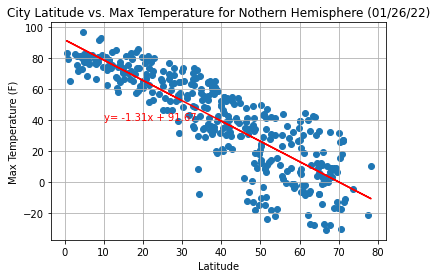

<Figure size 432x288 with 0 Axes>

In [13]:
nothern_hemisphere_df = clean_city_data[clean_city_data["Lat"] > 0]
y_axis = nothern_hemisphere_df["Max Temp"]
x_axis = nothern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("City Latitude vs. Max Temperature for Nothern Hemisphere (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (F)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(10,40), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("North_Hemisphere_City_Latitude_vs_Max_Temperature.png");

# Explanation of Plot
- This graph is showing the max temperature in Faranheit vs the latitude (distance between a point on the Earth's surface and the equator) for the North Hemisphere (latitude > 0). As seen in the regression line, there is a clear negative linear correlation between the 2 variables (r-value = -0.87, which is close to the perfect negative linear regression of -1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y= 0.2x + 78.4
The r-value is 0.35


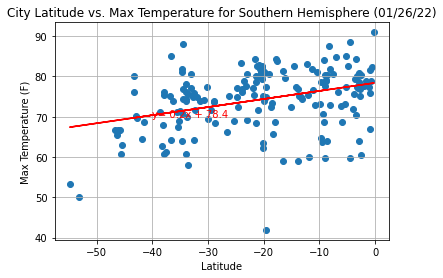

<Figure size 432x288 with 0 Axes>

In [14]:
southern_hemisphere_df = clean_city_data[clean_city_data["Lat"] < 0]
y_axis = southern_hemisphere_df["Max Temp"]
x_axis = southern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("City Latitude vs. Max Temperature for Southern Hemisphere (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (F)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-40,70), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show();

#Save as png
plt.savefig("South_Hemisphere_City_Latitude_vs_Max_Temperature.png");

# Explanation of Plot
- This graph is showing the max temperature in Faranheit vs the latitude (distance between a point on the Earth's surface and the equator) for the South Hemisphere (latitude < 0). As seen in the regression line, there is a somewhat linear relationship between the variables (with an r-value of 0.45)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y= 0.49x + 50.63
The r-value is 0.41


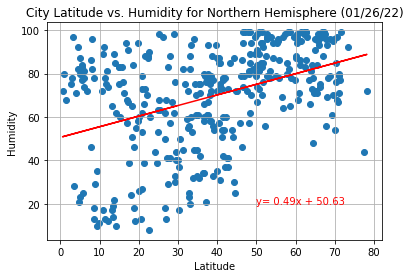

<Figure size 432x288 with 0 Axes>

In [15]:
y_axis = nothern_hemisphere_df["Humidity"]
x_axis = nothern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("City Latitude vs. Humidity for Northern Hemisphere (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Humidity");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(50,20), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("North_Hemisphere_City_Latitude_vs_Humidity.png");

# Explanation of Plot
- This graph is showing the humidity percentage vs the latitude (distance between a point on the Earth's surface and the equator) for the North Hemisphere (latitude > 0). As seen in the regression line, there is somewhat of a positive correlation between the 2 variables

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y= 0.4x + 84.45
The r-value is 0.33


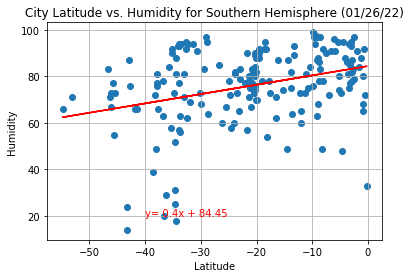

<Figure size 432x288 with 0 Axes>

In [16]:
y_axis = southern_hemisphere_df["Humidity"]
x_axis = southern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("City Latitude vs. Humidity for Southern Hemisphere (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Humidity");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-40,20), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("South_Hemisphere_City_Latitude_vs_Humidity.png");

# Explanation of Plot
- This graph is showing the humidity percentage vs the latitude (distance between a point on the Earth's surface and the equator) for the South Hemisphere (latitude < 0). As seen in the regression line, there is somewhat of a positive correlation between the 2 variables

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y= 0.56x + 33.34
The r-value is 0.26


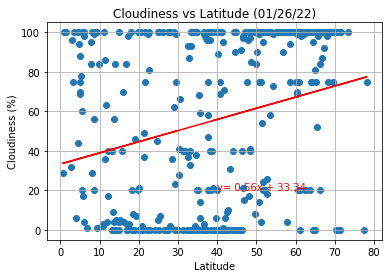

<Figure size 432x288 with 0 Axes>

In [17]:
y_axis = nothern_hemisphere_df["Cloudiness"]
x_axis = nothern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Cloudiness vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness (%)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(40,20), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("North_Hemisphere_City_Latitude_vs_Cloudiness.png");

# Explanation of Plot
- This graph is showing the cloudiness percentage vs the latitude (distance between a point on the Earth's surface and the equator) for the North Hemisphere (latitude > 0). The linear regression that has an R^2 of 0.1 demonstrated that there is no linear relationship between these 2 variables

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y= 0.96x + 82.27
The r-value is 0.34


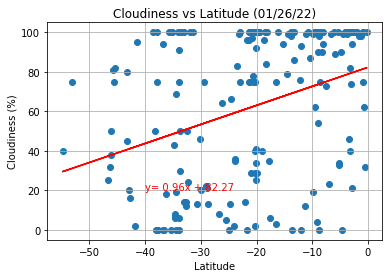

<Figure size 432x288 with 0 Axes>

In [18]:
y_axis = southern_hemisphere_df["Cloudiness"]
x_axis = southern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Cloudiness vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness (%)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-40,20), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("South_Hemisphere_City_Latitude_vs_Cloudiness.png");

# Explanation of Plot
- This graph is showing the cloudiness percentage vs the latitude (distance between a point on the Earth's surface and the equator) for the South Hemisphere (latitude < 0). The linear regression that has an R^2 of 0.07 demonstrated that there is no linear relationship between these 2 variables

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y= 0.02x + 7.78
The r-value is 0.06


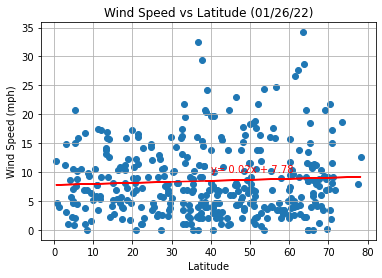

<Figure size 432x288 with 0 Axes>

In [19]:
y_axis = nothern_hemisphere_df["Wind Speed"]
x_axis = nothern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Wind Speed vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (mph)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(40,10), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("North_Hemisphere_City_Latitude_vs_Wind_Speed.png");

# Explanation of Plot
- This graph is showing the wind speed in miles per hour vs the latitude (distance between a point on the Earth's surface and the equator) for the North Hemisphere (latitude > 0). By looking at the graph we can see that there is no linear relationship between these 2 variables

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y= -0.09x + 6.38
The r-value is -0.21


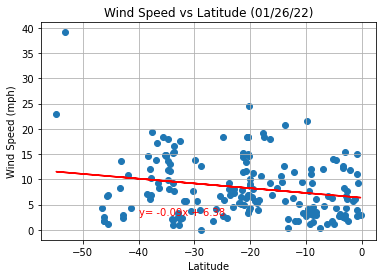

<Figure size 432x288 with 0 Axes>

In [20]:
y_axis = southern_hemisphere_df["Wind Speed"]
x_axis = southern_hemisphere_df["Lat"];
plt.scatter(x_axis,y_axis);
plt.title("Wind Speed vs Latitude (01/26/22)");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (mph)");
plt.grid()
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = ("y= " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print("The line equation is " + line_eq)
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq,(-40,3), fontsize = 10, color = "red")
print("The r-value is %.2f" % (rvalue))
plt.show()

#Save as png
plt.savefig("South_Hemisphere_City_Latitude_vs_Wind_Speed.png");

# Explanation of Plot
- This graph is showing the wind speed in miles per hour vs the latitude (distance between a point on the Earth's surface and the equator) for the South Hemisphere (latitude < 0). By looking at the graph we can see that there is no linear relationship between these 2 variables